In [16]:
import pandas as pd
import sklearn
import numpy as np
import sys

In [17]:
v_data=pd.read_table("Vertebral.dat", sep="\s+", header=None)
v_data.columns=['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spon','class']
v_data['class'] = v_data['class'].map({'DH': 1, 'SL': 2, 'NO': 3})
v_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spon,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1


In [18]:
from sklearn.cross_validation import train_test_split
X, y = v_data.iloc[:, :6].values, v_data['class']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=10)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2,
metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
knn.score(X_train, y_train, sample_weight=None)

0.84792626728110598

In [21]:
knn.score(X_test,y_test,sample_weight=None)

0.88172043010752688

In [22]:
from sklearn.model_selection import cross_val_score
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, p=2,metric='minkowski')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is:21


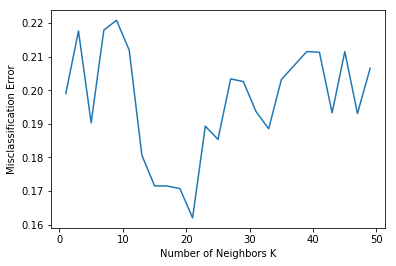

In [23]:
# changing to misclassification error
import matplotlib.pyplot as plt
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is:"+str(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()